In [1]:
#! pip install translate
import pandas as pd, numpy as np, xlsxwriter, matplotlib.pyplot as plt, seaborn as sns, os, math
from datetime import datetime as dt
from openpyxl import load_workbook
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from notifypy import Notify
notification = Notify()
from googletrans import Translator
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\n*****Required libraries imported*****")


*****Required libraries imported*****


# Mention project raw data filename below

In [9]:
file_Name = 'cases_report_DBS Bank Foundation_ALL_(All States)_2024-09-02.xlsx'
exe_start = dt.now() # Recording execution start time

# Asking for project ID from the user
PID = input('Please provide PID of project = ')

Please provide PID of project =  PID/DBSBA/2023/DI/YK/0266


In [10]:
def csvORexcel():
    global path
    path = "C:\\Python\\read\\"+file_Name
    try:
        if file_Name.split('.')[-1].startswith('c'):
            df = pd.read_csv(path)
            return df
        elif file_Name.split('.')[-1].startswith('x'):
            df = pd.read_excel(path)
            return df
    except FileNotFoundError:
        print("The file name {0} has not found".format(path))

fn = file_Name

In [11]:
data0 = csvORexcel() # Reading exce/csv file
init_file_size = round(os.path.getsize(path)/1000000,2) # Getting excel file size
#data0 = pd.read_excel(r'C:\Users\akash\Documents\Haqdarshak\Work\Nassscom\1.0\cases_report__1_Nasscom1_uniques_till_27_Feb.xlsx', "Unique DI Data")
data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,Case Organization,Case District,Citizen GUID,Citizen Name,DOB,Gender,Mobile,Age,Citizen State,Citizen District,Citizen Pincode,Citizen Village,Family GUID,HD ID,HD Name,Opsco name,AMS ID
0,EP021VKV,2023-04-07,Digital Health ID card_AP,SH0009IF,Case Aborted,NaT,NaT,Not Suspected,AP - DBS Bank Foundation,Anakapalli,PN028OOQ,Pulavala Jyoti,2002-01-01,F,9.908212e+09,22.0,Andhra Pradesh,Anakapalli,530111.0,Anakapalli,PG020V93,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0
1,EP021VLE,2023-04-07,Digital Health ID card_AP,SH0009IF,Case Aborted,NaT,NaT,Not Suspected,AP - DBS Bank Foundation,Anakapalli,PN028OP4,Gottumukkala Venkaraju,2000-11-01,M,8.099923e+09,23.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG020V9G,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0
2,EP02217W,2023-04-09,PM KISAN E-KYC- AP,SH0009H8,Case Aborted,NaT,NaT,Not Suspected,AP - DBS Bank Foundation,Anakapalli,PN028VXQ,Sarakani Nagaraju,1970-01-01,M,6.302465e+09,54.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG0211W6,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0
3,EP022188,2023-04-09,PM KISAN E-KYC- AP,SH0009H8,Case Aborted,NaT,NaT,Not Suspected,AP - DBS Bank Foundation,Anakapalli,PN028VYL,Vagudunda Ramu,1986-01-01,M,8.142924e+09,38.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG0211WZ,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0
4,EP02218L,2023-04-09,PM KISAN E-KYC- AP,SH0009H8,Case Aborted,NaT,NaT,Not Suspected,AP - DBS Bank Foundation,Anakapalli,PN028VZE,Kunisetti Rajulamma,1990-01-01,F,9.189812e+09,34.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG0211XL,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0


In [12]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594782 entries, 0 to 594781
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Case Id                594781 non-null  object        
 1   Createdon              594781 non-null  datetime64[ns]
 2   Scheme/Doc             594781 non-null  object        
 3   Scheme/Doc GUID        594781 non-null  object        
 4   Status                 594781 non-null  object        
 5   Docket Submitted Date  517920 non-null  datetime64[ns]
 6   Benefit received Date  494190 non-null  datetime64[ns]
 7   HD Suspected Cases     594781 non-null  object        
 8   Case Organization      594781 non-null  object        
 9   Case District          594781 non-null  object        
 10  Citizen GUID           594781 non-null  object        
 11  Citizen Name           594780 non-null  object        
 12  DOB                    594781 non-null  date

In [13]:
states = {'AP':'Andhra Pradesh',
'AR':'Arunachal Pradesh',
'AS':'Assam',
'BR':'Bihar',
'BH':'Bihar',
'CT':'Chhattisgarh',
'CG':'Chhattisgarh',
'DL':'Delhi', 
'GA':'Goa',
'GJ':'Gujarat',
'HR':'Haryana',
'HP':'Himachal Pradesh',
'JH':'Jharkhand',
'KA':'Karnataka',
'KL':'Kerala',
'MP':'Madhya Pradesh',
'MH':'Maharashtra',
'MN':'Manipur',
'ML':'Meghalaya',
'MZ':'Mizoram',
'NL':'Nagaland',
'OR':'Odisha',
'PB':'Punjab',
'RJ':'Rajasthan',
'SK':'Sikkim',
'TN':'Tamil Nadu',
'TG':'Telangana',
'TR':'Tripura',
'UP':'Uttar Pradesh',
'UT':'Uttarakhand',
'WB':'West Bengal'}

# Data Cleaning

In [14]:
# Defining a function to remove extra spaces between words.
def rem_space(x):
    try:
        n = x.strip(' ').split(' ') # Remove extra spaces from begining and end then splitting the name.
    except AttributeError:
        n = str(x).strip(' ').split(' ') # Remove extra spaces from begining and end then splitting the name.
    
    name = '' # Decalring a empty name
    
    for w in n:
        if w != '': # This will execute if non empty word found
            if name == '': # This will run if "name" variable is empty
                name = w # Storing name into "name" variable.
            else: # This will run if "name" variable is not empty
                name = name + ' ' + w # Joining the names with single spaces.
    
    return name

In [15]:
# Remove last row.
data0.drop(index = data0[data0.Createdon.isna()].index, inplace=True)

# Replace null values
data0['Scheme/Doc'].fillna('a', inplace=True)
data0['Citizen Name'].fillna('a', inplace=True)
data0['HD Name'].fillna('blank', inplace=True)
data0.Mobile.fillna(0, inplace=True)

# Changing status values and keeping only "Open/Submit/BR"
data0['Status'] = data0['Status'].apply(lambda x: 'Open' if x == 'Data complete' else 'Submitted' if (x=='Docket submitted' or x=='Document ready') else "Benefit Received" if x=='Scheme/Document received' else x)

# Changing Case Organization values from state initials to full state name.
data0['Case Organization'] = data0['Case Organization'].apply(lambda x: states[x[:2]])

# Renaming column "Case Organiisation" & "Case District" to "State" & "Disctrict"
data0.rename(columns={"Case Organization":"State","Case District":"District"}, inplace=True)

# Removing extra spaces in Opsco name 
data0['Opsco name'] = data0['Opsco name'].apply(lambda x: rem_space(x))

# Convert Mobile column from float to string for concatenation.
data0['Mobile'] = data0['Mobile'].apply(lambda x: str(x).strip())
#data0['Mobile'] = data0['Mobile'].astype('int64')
data0['Mobile'] = data0['Mobile'].astype('str')

# Change gender from initial letter to full form.
data0['Gender'] = data0['Gender'].apply(lambda x: 'Male' if x=='M' else 'Female' if x=='F' else 'Other' if x=='O' else x)

# Convert "Createdon", "Docket Submitted Date", "Benefit received Date" column data type to Datetime format
dt_col = ['Createdon', 'Docket Submitted Date', 'Benefit received Date', 'DOB']

for col in dt_col:
    try:
        data0[col] = pd.to_datetime(data0[col], format='mixed', errors='ignore')
        #data0[col] = data0[col].apply(lambda x: x.strftime('%d-%m-%Y') if type(x) != pd._libs.tslibs.nattype.NaTType else x)
    except KeyError:
        continue


# Deleting records with status "Case Aborted" and "Application rejected"
rejectedDF = data0[(data0.Status == 'Case Aborted') | (data0.Status == 'Application rejected')] # Storing prev step deleted data
data0 = data0[(data0['Status'] != 'Case Aborted') & (data0['Status'] != 'Application rejected')]

data0.reset_index(inplace=True, drop=True)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537144 entries, 0 to 537143
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Case Id                537143 non-null  object        
 1   Createdon              537144 non-null  datetime64[ns]
 2   Scheme/Doc             537144 non-null  object        
 3   Scheme/Doc GUID        537144 non-null  object        
 4   Status                 537144 non-null  object        
 5   Docket Submitted Date  504396 non-null  datetime64[ns]
 6   Benefit received Date  482071 non-null  datetime64[ns]
 7   HD Suspected Cases     537144 non-null  object        
 8   State                  537144 non-null  object        
 9   District               537144 non-null  object        
 10  Citizen GUID           537144 non-null  object        
 11  Citizen Name           537144 non-null  object        
 12  DOB                    537144 non-null  date

# Translate local language district name to English

### Custom translator

In [16]:
def Trans(x):
    t = Translator()
    attempt = 0
    max_attempts = 5
    alph = [chr(i) for i in range(65,122)]

    while attempt < max_attempts:
        if x[0] not in alph:
            try:
                xlated = t.translate(x)
                return xlated.text
            except AttributeError as e:
                if 'raise_Exception' in str(e):
                    print(f"Encountered rate limit error, attempt {attempt+1}/{max_attempts}. Retrying in 8 seconds...")
                    time.sleep(8)
                    attempt += 1
                else:
                    raise
            except Exception as e:
                print(e)
                break
            return "Failed to translate after multiple attempts."
        else:
            return x.title()

dist = {}

for d in data0['District'].value_counts().index:
    if d in dist.keys():
        break
    else:
        dist[d] = Trans(d)

dist

{'Nandyal': 'Nandyal',
 'BILASPUR': 'Bilaspur',
 'Anakapalli': 'Anakapalli',
 'SALEM': 'Salem',
 'MEDCHAL MALKAJGIRI': 'Medchal Malkajgiri',
 'DHAMTARI': 'Dhamtari',
 'KHORDHA': 'Khordha',
 'HYDERABAD': 'Hyderabad',
 'TIRUCHIRAPPALLI': 'Tiruchirappalli',
 'CUTTACK': 'Cuttack',
 'Dhamtari': 'Dhamtari',
 'Medchal Malkajgiri': 'Medchal Malkajgiri',
 'Salem': 'Salem',
 'JAJAPUR': 'Jajapur',
 'Bilaspur': 'Bilaspur',
 'Hyderabad': 'Hyderabad',
 'Tiruchirappalli': 'Tiruchirappalli',
 'MALKANGIRI': 'Malkangiri',
 'Khordha': 'Khordha',
 'ANANTAPUR': 'Anantapur',
 'Y.S.R.': 'Y.S.R.',
 'Cuttack': 'Cuttack',
 'PURI': 'Puri',
 'DHARMAPURI': 'Dharmapuri',
 'CHENNAI': 'Chennai',
 'BHADRAK': 'Bhadrak',
 'KARUR': 'Karur',
 'MAHASAMUND': 'Mahasamund',
 'JAYASHANKAR BHUPALAPALLY': 'Jayashankar Bhupalapally',
 'Chennai': 'Chennai',
 'Vizianagaram': 'Vizianagaram',
 'Ananthapuram': 'Ananthapuram',
 'Bilasapur': 'Bilasapur',
 'Sangareddy': 'Sangareddy',
 'NANDYALA': 'Nandyala',
 'Mahasamund': 'Mahasamund',


In [17]:
# Renaming Case District name from local language to english

data0['District'] = data0['District'].apply(lambda x: "Dohad" if x=="દોહદ" else "Haridwar" if x=="हरिद्वार" else "UDHAM SINGH NAGAR".title() if (x=="उदम सिंह नगर" or x=="Udam Singh Nagar" or x=="UDAM SINGH NAGAR")
                             else "Sitamarhi" if x=="सीतामढ़ी" else "Mahasamund" if (x=="महासमुंद" or x=="Mahasamand")
                             else "Rajgarh" if x=="राजगढ़" else "Muzaffarpur" if x=="मुजफ्फरपुर" else "Nawada" if x=="नवादा" else "Balrampur" if x=="बलरामपुर"
                             else "DAMOH".title() if x=="दमोह" else "Shravasti" if x=="श्रावस्ती" else "NARMADA".title() if x=="નર્મદા" else "Chhatarpur" if (x=="छतरपुर" or x=="Chhattarpur")
                             else 'East Singhbum' if x=='ईस्ट सिंघबम' else 'Chhindwara' if x=='छिंदवारा' else 'Jalna' if x=='जालना' else 'Dhule' if x=='धुळे' else "Dhanbad" if x=="धनबाद"
                             else 'Banas Kantha' if x=='બનાસ કાંઠા' else 'Dhamtari' if x=='धमतरी' else 'Bilaspur' if x=='बिलासपुर' else dist[x])

data0['District'].value_counts()

District
Nandyal                     61037
Bilaspur                    55511
Salem                       54881
Dhamtari                    53977
Medchal Malkajgiri          53521
Anakapalli                  47615
Hyderabad                   43757
Khordha                     43167
Tiruchirappalli             42555
Cuttack                     30314
Jajapur                      9678
Malkangiri                   6009
Chennai                      4902
Anantapur                    4466
Dharmapuri                   4065
Y.S.R.                       3917
Puri                         3766
Bhadrak                      3392
Karur                        2664
Mahasamund                   2447
Jayashankar Bhupalapally     1070
Vizianagaram                  901
Ananthapuram                  732
Bilasapur                     649
Sangareddy                    548
Nandyala                      518
Mancherial                    272
Jajpur                        206
Kalahandi                     113
Waran

# Mention orgwise scheme applied raw data filename below

In [18]:
file_Name = 'orgwise_schemes_applied.xlsx'

In [19]:
# Importing Schemes data from Orgwise schemes applied report
schemeDetails = csvORexcel()
schemeDetails = schemeDetails[~schemeDetails['Parent Scheme GUID'].isna()]
schemeDetails = schemeDetails[schemeDetails['Project Id'] == PID]
schemeDetails.head()

,State,Org Name,Project Id,Scheme Id,status,Parent Scheme GUID,Parent Scheme,Scheme Name,Scheme type,Fee,Timeline,Benefit Value,Open,Submitted,Received
2355,Odisha,OR - DBS Bank Foundation,PID/DBSBA/2023/DI/YK/0266,DC0004P5,5,PDC0009KZ,Domicile Certificate,OR - Residential Certificate,doc,150,15,26606,21866,14686.0,9596.0
2356,Odisha,OR - DBS Bank Foundation,PID/DBSBA/2023/DI/YK/0266,SH0009HD,5,PDC0009K5,E-Shram Card,E-Shram Card (Central),sch,0,1,110033,3741,3141.0,3129.0
2357,Odisha,OR - DBS Bank Foundation,PID/DBSBA/2023/DI/YK/0266,DC0004PB,5,PDC0009LU,Caste Certificate,OR - Caste Certificate,doc,100,55,18440,838,617.0,323.0
2358,Odisha,OR - DBS Bank Foundation,PID/DBSBA/2023/DI/YK/0266,SH0009XT,5,PSH000C1A,Farmer Registration,Farmer Registration_OR,sch,100,1,5000,2168,1620.0,1613.0
2359,Odisha,OR - DBS Bank Foundation,PID/DBSBA/2023/DI/YK/0266,DC0000YS,5,PDC0009KX,Voter ID,Voter ID (Central),doc,50,30,100,1774,686.0,276.0


In [20]:
# Removing colomuns except 'Scheme Id','Scheme type','Benefit Value' to merge with main dataframe
for s in schemeDetails.columns:
    if s not in ['Scheme Id','Scheme type','Benefit Value','Parent Scheme']:
        schemeDetails.drop(columns=s, inplace=True)

# Merging scheme details with main dataframe to get data of Scheme type & Benefit Value.
data0 = data0.merge(schemeDetails.drop_duplicates(subset=['Scheme Id'], keep='last'), left_on='Scheme/Doc GUID', right_on="Scheme Id", how='left')

# Removing non required column "Scheme ID"
data0.drop(columns = 'Scheme Id', inplace=True)

# Changing short form to "Scheme" & "Document"
data0['Scheme type'] = data0['Scheme type'].apply(lambda x: 'Scheme' if x=='sch' else 'Document' if x=='doc' else x)

# Converting "Benefit Value" columns to integer type
data0['Benefit Value'].fillna('0', inplace=True)
data0['Benefit Value'] = data0['Benefit Value'].apply(lambda x: int(x) if x.isnumeric() else 0)
data0['Benefit Value'] = data0['Benefit Value'].astype('int64')

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,DOB,Gender,Mobile,Age,Citizen State,Citizen District,Citizen Pincode,Citizen Village,Family GUID,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value
0,EP021T89,2023-04-06,E-Shram Card_AP,SH0009HU,Benefit Received,2023-04-07,2023-04-07,Not Suspected,Andhra Pradesh,Anakapalli,PN028LBU,Chandraka Rajeswari,1981-01-01,Female,6309307476.0,43.0,Andhra Pradesh,Anakapalli,531021.0,Anakapalli,PG020S2G,Poodi.Hemalatha,Poodi Hemalatha,Bandaru Satyanarayana,6532.0,E-Shram Card,Scheme,110033
1,EP021VIF,2023-04-07,Digital Health ID card_AP,SH0009IF,Benefit Received,2023-07-21,2023-07-21,Not Suspected,Andhra Pradesh,Anakapalli,PN028OLU,Katha Rishi,2012-06-29,Male,9652265496.0,12.0,ANDHRA PRADESH,Anakapalli,531011.0,Dosuru,PG020V6C,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Digital Health ID card,Scheme,50
2,EP021VM2,2023-04-07,Digital Health ID card_AP,SH0009IF,Benefit Received,2023-04-07,2023-04-07,Not Suspected,Andhra Pradesh,Anakapalli,PN028OPO,Yarrabolu Raju,1990-01-01,Male,8688274184.0,34.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG020V9Z,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Digital Health ID card,Scheme,50
3,EP02217Y,2023-04-09,PM KISAN E-KYC- AP,SH0009H8,Benefit Received,2023-05-29,2023-05-29,Not Suspected,Andhra Pradesh,Anakapalli,PN028VXY,Majji Laxmi,1980-01-01,Female,8790425163.0,44.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG0211WE,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,e-KYC for PM Kisan Samman Nidhi Yojana,Scheme,19247
4,EP022184,2023-04-09,PM KISAN E-KYC- AP,SH0009H8,Benefit Received,2023-05-29,2023-05-29,Not Suspected,Andhra Pradesh,Anakapalli,PN028VYF,Shek Sannisheb,1980-04-01,Male,9989186322.0,44.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG0211WU,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,e-KYC for PM Kisan Samman Nidhi Yojana,Scheme,19247


In [21]:
# Checking if number of data point has increased or not
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537144 entries, 0 to 537143
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Case Id                537143 non-null  object        
 1   Createdon              537144 non-null  datetime64[ns]
 2   Scheme/Doc             537144 non-null  object        
 3   Scheme/Doc GUID        537144 non-null  object        
 4   Status                 537144 non-null  object        
 5   Docket Submitted Date  504396 non-null  datetime64[ns]
 6   Benefit received Date  482071 non-null  datetime64[ns]
 7   HD Suspected Cases     537144 non-null  object        
 8   State                  537144 non-null  object        
 9   District               537144 non-null  object        
 10  Citizen GUID           537144 non-null  object        
 11  Citizen Name           537144 non-null  object        
 12  DOB                    537144 non-null  date

# Mention rate card raw data file name below

In [22]:
file_Name = 'rate_card.xlsx'

In [23]:
rate_card = csvORexcel()
rate_card = rate_card[rate_card['Org_PID'] == PID].sort_values('created_on')
rate_card.head()

,Org_PID,Org_Name,org_id,schemes_Guid,sch_name,sch id,ratecard_guid,open_price,Docket submitted price,scheme_document_received price,created_on
52268,PID/DBSBA/2023/DI/YK/0266,TN - DBS Bank Foundation,1132,SH000A1K,Marriage Assistance (BOCW)_TN,13016,RC00O9MW,0.0,0.0,40.0,2023-03-20 07:45:24
52274,PID/DBSBA/2023/DI/YK/0266,TN - DBS Bank Foundation,1132,SH0001A4,Monthly Income Scheme (MIS) Account (Central),1660,RC00O9MW,0.0,0.0,40.0,2023-03-20 07:45:24
52273,PID/DBSBA/2023/DI/YK/0266,TN - DBS Bank Foundation,1132,SH000A1I,Maternity Benefit Scheme (BOCW)_TN,13014,RC00O9MW,0.0,0.0,40.0,2023-03-20 07:45:24
52272,PID/DBSBA/2023/DI/YK/0266,TN - DBS Bank Foundation,1132,SH00028P,Maternity Assistance for Puthirai vannar/Sanit...,2905,RC00O9MW,0.0,0.0,40.0,2023-03-20 07:45:24
52271,PID/DBSBA/2023/DI/YK/0266,TN - DBS Bank Foundation,1132,SH000405,Marriage Assistance to Normal Persons Marrying...,5189,RC00O9MW,0.0,0.0,40.0,2023-03-20 07:45:24


In [24]:
# Defining a function for HD payment calculation which will take cases report and rate card as input and return final cases report with hd payment column

def hdPayment(data0, rate_card):
    price = {'index':[], 'Scheme/Doc GUID':[], 'open_price':[], 'Docket submitted price':[], 'scheme_document_received price':[]} # Declaring a blank dictionary for storing price.
    
    for SID, di in zip(data0['Scheme/Doc GUID'], data0['Scheme/Doc GUID'].index): # Getting Scheme GUID and index number from schemes data.
        price['Scheme/Doc GUID'].append(SID) # Storing Scheme GUID from schemes data.
        price['index'].append(di) # Storing index number from schemes data.
        rate_sch = rate_card[rate_card.schemes_Guid == SID].sort_values('created_on') # Storing scheme GUID based filtered data from rate_card.
        rate_sch['created_on'] = rate_sch.created_on.apply(lambda x: x.strftime("%d-%m-%Y"))
        for d in rate_sch:
            date_sch = rate_card[rate_card.created_on == d].sort_values('created_on')
            if date_sch.shape[0] > 1:
                rate_sch.drop(index = date_sch.index.min(), inplace=True)
        rate_sch.created_on = pd.to_datetime(rate_sch.created_on, format='mixed', errors='ignore')
        if rate_sch.shape[0] > 1: # Checking if filtered data has more than 1 results.
            for i in rate_sch.index: # Iterating through filtered results.
                if data0.Createdon.loc[di] >= rate_sch.created_on.iloc[-1]: # Checking if cases created date is later than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.iloc[-1]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].iloc[-1]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].iloc[-1]) # Storing BR price from rate card to "price" dictionary.
                    #print('for if = {0} >= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.iloc[-1]))
                    break
                elif data0.Createdon.loc[di] <= rate_sch.created_on.loc[i]: # Checking if cases created date is earlier than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.loc[i]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[i]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[i]) # Storing BR price from rate card to "price" dictionary.
                    #print('for elif = {0} <= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.loc[i]))
                    break
        else: # This will execute if filtered data has only single result.
            #print(SID)
            try:
                price['open_price'].append(rate_sch.open_price.loc[rate_sch.index[0]]) # Storing open price from rate card to "price" dictionary.
                price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[rate_sch.index[0]]) # Storing DS price from rate card to "price" dictionary.
                price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[rate_sch.index[0]]) # Storing BR price from rate card to "price" dictionary.
                #print('if-else')
            except: # This will execute if Scheme not available in rate card under selected PID
                #print(SID)
                price['open_price'].append(0) # Storing open price from rate card to "price" dictionary.
                price['Docket submitted price'].append(0) # Storing DS price from rate card to "price" dictionary.
                price['scheme_document_received price'].append(0) # Storing BR price from rate card to "price" dictionary
    
    price = pd.DataFrame(price) # Converting price dictionary to pandas dataframe.
    data0 = data0.merge(price.drop(columns=['Scheme/Doc GUID']), left_on=data0.index, right_on='index', how='left') # Merging "price" datafram with "cases report".
    data0.drop(columns=['index'], inplace=True) # Removing index column
    data0['HD_Payment'] = data0.open_price + data0['Docket submitted price'] + data0['scheme_document_received price'] # Adding column for HD payment.
    return data0

In [25]:
data0 = hdPayment(data0, rate_card)
#rejectedDF = hdPayment(rejectedDF, rate_card)

In [26]:
data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,DOB,Gender,Mobile,Age,Citizen State,Citizen District,Citizen Pincode,Citizen Village,Family GUID,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment
0,EP021T89,2023-04-06,E-Shram Card_AP,SH0009HU,Benefit Received,2023-04-07,2023-04-07,Not Suspected,Andhra Pradesh,Anakapalli,PN028LBU,Chandraka Rajeswari,1981-01-01,Female,6309307476.0,43.0,Andhra Pradesh,Anakapalli,531021.0,Anakapalli,PG020S2G,Poodi.Hemalatha,Poodi Hemalatha,Bandaru Satyanarayana,6532.0,E-Shram Card,Scheme,110033,0.0,0.0,40.0,40.0
1,EP021VIF,2023-04-07,Digital Health ID card_AP,SH0009IF,Benefit Received,2023-07-21,2023-07-21,Not Suspected,Andhra Pradesh,Anakapalli,PN028OLU,Katha Rishi,2012-06-29,Male,9652265496.0,12.0,ANDHRA PRADESH,Anakapalli,531011.0,Dosuru,PG020V6C,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Digital Health ID card,Scheme,50,0.0,0.0,40.0,40.0
2,EP021VM2,2023-04-07,Digital Health ID card_AP,SH0009IF,Benefit Received,2023-04-07,2023-04-07,Not Suspected,Andhra Pradesh,Anakapalli,PN028OPO,Yarrabolu Raju,1990-01-01,Male,8688274184.0,34.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG020V9Z,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Digital Health ID card,Scheme,50,0.0,0.0,40.0,40.0
3,EP02217Y,2023-04-09,PM KISAN E-KYC- AP,SH0009H8,Benefit Received,2023-05-29,2023-05-29,Not Suspected,Andhra Pradesh,Anakapalli,PN028VXY,Majji Laxmi,1980-01-01,Female,8790425163.0,44.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG0211WE,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,e-KYC for PM Kisan Samman Nidhi Yojana,Scheme,19247,0.0,0.0,40.0,40.0
4,EP022184,2023-04-09,PM KISAN E-KYC- AP,SH0009H8,Benefit Received,2023-05-29,2023-05-29,Not Suspected,Andhra Pradesh,Anakapalli,PN028VYF,Shek Sannisheb,1980-04-01,Male,9989186322.0,44.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG0211WU,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,e-KYC for PM Kisan Samman Nidhi Yojana,Scheme,19247,0.0,0.0,40.0,40.0


In [27]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537144 entries, 0 to 537143
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Case Id                         537143 non-null  object        
 1   Createdon                       537144 non-null  datetime64[ns]
 2   Scheme/Doc                      537144 non-null  object        
 3   Scheme/Doc GUID                 537144 non-null  object        
 4   Status                          537144 non-null  object        
 5   Docket Submitted Date           504396 non-null  datetime64[ns]
 6   Benefit received Date           482071 non-null  datetime64[ns]
 7   HD Suspected Cases              537144 non-null  object        
 8   State                           537144 non-null  object        
 9   District                        537144 non-null  object        
 10  Citizen GUID                    537144 non-null  object 

# DFL Schemes

- SH0009SW = Digital productivity Service_ Basic
- SH000BM6 = Digital productivity Service_Basic
- SH000AG6 = Digital Productivity Services_Advanced
- SH000A32 = Long Training on Digital & Financial Inclusion_Private
- SH0009SW = Short Training on Digital & Financial Inclusion_Private
- SH000AG6 = Digital Productivity Services and and employability training_Advanced

# Removing DFL data

In [28]:
# Adding column "Scheme Type" to differentiate Schemes and DFL
data0["Scheme Category"] = data0['Scheme/Doc GUID'].apply(lambda x: "DFL" if (x=="SH0009SW" or x=="SH000AG6" or x=="SH000A32" or x=="SH0009SW" or x=="SH000AG6" or x=="SH000BM6") else "E-Gov")
og_DF=data0.copy()
dfl = data0[(data0['Scheme/Doc GUID'] == 'SH0009SW') | (data0['Scheme/Doc GUID'] == 'SH000AG6') | (data0['Scheme/Doc GUID'] == 'SH000A32') | (data0['Scheme/Doc GUID']=='SH0009SW') | (data0['Scheme/Doc GUID']=='SH000AG6') | (data0['Scheme/Doc GUID']=='SH000BM6')]
data0 = data0[(data0['Scheme/Doc GUID'] != 'SH0009SW') & (data0['Scheme/Doc GUID'] != 'SH000AG6') & (data0['Scheme/Doc GUID'] != 'SH000A32') & (data0['Scheme/Doc GUID']!='SH0009SW') & (data0['Scheme/Doc GUID']!='SH000AG6') & (data0['Scheme/Doc GUID']!='SH000BM6')]
print("DFL Count={0}\nE-Gov Count={1}".format(len(dfl),len(data0)))

DFL Count=162001
E-Gov Count=375143


In [29]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375143 entries, 0 to 537143
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Case Id                         375142 non-null  object        
 1   Createdon                       375143 non-null  datetime64[ns]
 2   Scheme/Doc                      375143 non-null  object        
 3   Scheme/Doc GUID                 375143 non-null  object        
 4   Status                          375143 non-null  object        
 5   Docket Submitted Date           347693 non-null  datetime64[ns]
 6   Benefit received Date           326016 non-null  datetime64[ns]
 7   HD Suspected Cases              375143 non-null  object        
 8   State                           375143 non-null  object        
 9   District                        375143 non-null  object        
 10  Citizen GUID                    375143 non-null  object      

# Duplicate Column

In [30]:
# Filling missing values of "Parent Scheme" from "Scheme/Doc" column
for i in data0[data0['Parent Scheme'].isna()].index:
    data0['Parent Scheme'][i] = data0['Scheme/Doc'][i]
    
# Creating column with name 'duplicate' by concatenation
data0['duplicate'] = data0['Scheme/Doc'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
dfl['duplicate'] = dfl['Scheme/Doc'] + dfl['Citizen Name'] + dfl['Mobile']
data0['duplicate'] = data0['duplicate'].apply(lambda x: x.lower()) # Converting duplicate column in lower case because python considers ASCII values of each character while checking for duplicates.
dfl['duplicate'] = dfl['duplicate'].apply(lambda x: x.lower())
data0['parent_duplicate'] = data0['Parent Scheme'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
data0['parent_duplicate'] = data0['parent_duplicate'].apply(lambda x: x.lower())
data0.Mobile = data0.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type
#dfl.Mobile = dfl.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,DOB,Gender,Mobile,Age,Citizen State,Citizen District,Citizen Pincode,Citizen Village,Family GUID,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate,parent_duplicate
0,EP021T89,2023-04-06,E-Shram Card_AP,SH0009HU,Benefit Received,2023-04-07,2023-04-07,Not Suspected,Andhra Pradesh,Anakapalli,PN028LBU,Chandraka Rajeswari,1981-01-01,Female,6309307476,43.0,Andhra Pradesh,Anakapalli,531021.0,Anakapalli,PG020S2G,Poodi.Hemalatha,Poodi Hemalatha,Bandaru Satyanarayana,6532.0,E-Shram Card,Scheme,110033,0.0,0.0,40.0,40.0,E-Gov,e-shram card_apchandraka rajeswari6309307476.0,e-shram cardchandraka rajeswari6309307476.0
1,EP021VIF,2023-04-07,Digital Health ID card_AP,SH0009IF,Benefit Received,2023-07-21,2023-07-21,Not Suspected,Andhra Pradesh,Anakapalli,PN028OLU,Katha Rishi,2012-06-29,Male,9652265496,12.0,ANDHRA PRADESH,Anakapalli,531011.0,Dosuru,PG020V6C,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Digital Health ID card,Scheme,50,0.0,0.0,40.0,40.0,E-Gov,digital health id card_apkatha rishi9652265496.0,digital health id cardkatha rishi9652265496.0
2,EP021VM2,2023-04-07,Digital Health ID card_AP,SH0009IF,Benefit Received,2023-04-07,2023-04-07,Not Suspected,Andhra Pradesh,Anakapalli,PN028OPO,Yarrabolu Raju,1990-01-01,Male,8688274184,34.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG020V9Z,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Digital Health ID card,Scheme,50,0.0,0.0,40.0,40.0,E-Gov,digital health id card_apyarrabolu raju8688274...,digital health id cardyarrabolu raju8688274184.0
3,EP02217Y,2023-04-09,PM KISAN E-KYC- AP,SH0009H8,Benefit Received,2023-05-29,2023-05-29,Not Suspected,Andhra Pradesh,Anakapalli,PN028VXY,Majji Laxmi,1980-01-01,Female,8790425163,44.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG0211WE,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,e-KYC for PM Kisan Samman Nidhi Yojana,Scheme,19247,0.0,0.0,40.0,40.0,E-Gov,pm kisan e-kyc- apmajji laxmi8790425163.0,e-kyc for pm kisan samman nidhi yojanamajji la...
4,EP022184,2023-04-09,PM KISAN E-KYC- AP,SH0009H8,Benefit Received,2023-05-29,2023-05-29,Not Suspected,Andhra Pradesh,Anakapalli,PN028VYF,Shek Sannisheb,1980-04-01,Male,9989186322,44.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG0211WU,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,e-KYC for PM Kisan Samman Nidhi Yojana,Scheme,19247,0.0,0.0,40.0,40.0,E-Gov,pm kisan e-kyc- apshek sannisheb9989186322.0,e-kyc for pm kisan samman nidhi yojanashek san...


In [31]:
dfl.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,DOB,Gender,Mobile,Age,Citizen State,Citizen District,Citizen Pincode,Citizen Village,Family GUID,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate
372,EP023MY7,2023-04-25,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,2023-04-28,2023-04-28,Suspected,Andhra Pradesh,Anakapalli,PN02AS1T,Kakara Venkatalakshml,1987-06-13,Female,9182137394.0,37.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG022TTM,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,30.0,30.0,DFL,short training on digital & financial inclusio...
377,EP023MZQ,2023-04-25,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,2023-04-28,2023-04-28,Not Suspected,Andhra Pradesh,Anakapalli,PN02AS3O,Palla Neelamma,1982-06-15,Female,8106741712.0,42.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG022TVE,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,30.0,30.0,DFL,short training on digital & financial inclusio...
434,EP023O6C,2023-04-26,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,2023-04-28,2023-04-28,Not Suspected,Andhra Pradesh,Anakapalli,PN02ATLM,Thirupati Vijayabhashkarrao,1971-10-04,Male,8106320534.0,52.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG022V8R,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,30.0,30.0,DFL,short training on digital & financial inclusio...
551,EP023Q1W,2023-04-26,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,2023-04-28,2023-04-28,Not Suspected,Andhra Pradesh,Anakapalli,PN02AVUL,Appanna Eswararao,1975-04-19,Male,8179466233.0,49.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG022XE3,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,30.0,30.0,DFL,short training on digital & financial inclusio...
624,EP023R4D,2023-04-27,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,2023-04-28,2023-04-28,Not Suspected,Andhra Pradesh,Anakapalli,PN02AWZ6,Nabdikolla Kumari,1985-08-02,Female,8008273645.0,39.0,Andhra Pradesh,Anakapalli,531011.0,Anakapalli,PG022YE8,Appikonda.Yamuna,Appikonda Yamuna,Bandaru Satyanarayana,6993.0,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,30.0,30.0,DFL,short training on digital & financial inclusio...


# Duplicate Data

In [32]:
# Checking number of all duplicate records
duplicateData = data0[data0.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
parentDuplicateData = data0[data0.duplicated(['parent_duplicate'],keep=False)].sort_values('parent_duplicate')
dflDuplicates = dfl[dfl.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
duplicateData = pd.concat([duplicateData,dflDuplicates], ignore_index=True)
duplicateData.reset_index(inplace=True, drop = True)

try:
    duplicateData.drop(index=duplicateData.index[-1], inplace=True)
except IndexError:
    print(duplicateData.shape)

duplicateData.shape

(3991, 35)

# Unique Data

In [33]:
# Keeping uniques excluding duplicates
#unique_data = data0.drop(index = data0[data0.duplicated(['duplicate'], keep='last')].index)
unique_data = data0.drop(index = data0[data0.duplicated(['parent_duplicate'], keep='last')].index)
unique_data.reset_index(inplace=True, drop = True)

try:
    unique_data.drop(index=unique_data.index[-1], inplace=True)
except IndexError:
    print(unique_data.shape)

unique_data.shape

(373619, 35)

# For NASSCOM FOUNDATION 1.0 Only

#### Remove non listed district data

In [34]:
if 'Nasscom1.0_All' in fn:
    NoListDict = pd.DataFrame(unique_data['District'].value_counts(normalize=True).reset_index())
    for dist in list(NoListDict[NoListDict['proportion']<0.001].District):
        unique_data = unique_data[unique_data.District!=dist]
    unique_data.District.value_counts()

In [35]:
# Creating table citizen to scheme ratio.
cit_sch_ratio = pd.DataFrame(unique_data['Citizen GUID'].value_counts())
cit_sch_ratio.rename(columns={'count':'No of cases'}, inplace=True)
cit_sch_ratio.reset_index(inplace=True)
cit_sch_ratio.head()

,Citizen GUID,No of cases
0,PN02IR7Q,10
1,PN03PKT0,10
2,PN03PPO3,9
3,PN02GBE7,9
4,PN02EKUW,9


In [36]:
# Merging no of cases with main project data.
unique_data = unique_data.merge(cit_sch_ratio.drop_duplicates(subset=['Citizen GUID']), on = 'Citizen GUID', how = 'left')
unique_data['No of cases'].fillna(0.0, inplace=True)
unique_data['No of cases'] = unique_data['No of cases'].astype('int64')
unique_data.reset_index(inplace=True, drop = True)
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373619 entries, 0 to 373618
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Case Id                         373619 non-null  object        
 1   Createdon                       373619 non-null  datetime64[ns]
 2   Scheme/Doc                      373619 non-null  object        
 3   Scheme/Doc GUID                 373619 non-null  object        
 4   Status                          373619 non-null  object        
 5   Docket Submitted Date           346520 non-null  datetime64[ns]
 6   Benefit received Date           325036 non-null  datetime64[ns]
 7   HD Suspected Cases              373619 non-null  object        
 8   State                           373619 non-null  object        
 9   District                        373619 non-null  object        
 10  Citizen GUID                    373619 non-null  object 

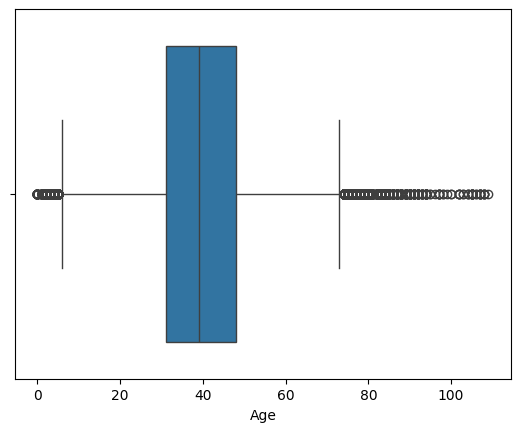

In [37]:
sns.boxplot(data=unique_data,x='Age')
plt.show()

# Project wise O / S / BR

,Status,Total Application
1,Open,27100
2,Submitted,21485
0,Benefit Received,325034
3,Grand Total,373619


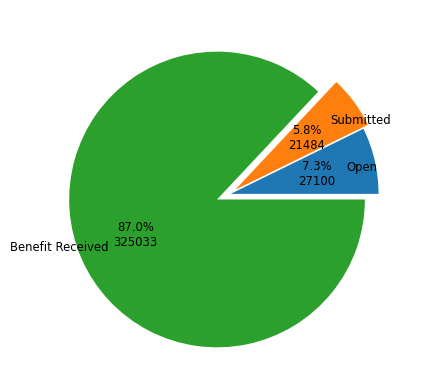

In [38]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

# Changing status values to O_S_BR
projectwise_O_S_BR = pd.DataFrame(unique_data.Status.value_counts())
projectwise_O_S_BR.rename(columns={'count':'Total Application'}, inplace=True)
projectwise_O_S_BR.reset_index(inplace=True)
projectwise_O_S_BR.loc[len(projectwise_O_S_BR.index)] = ['Grand Total', projectwise_O_S_BR['Total Application'].sum()]
try:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,2,0,3]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:3], labels=projectwise_O_S_BR['Status'][0:3], rotatelabels=False, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:3]), explode=[0.01,0.05,0.09], textprops={'fontsize' : 'small'}, labeldistance = 0.8)
except IndexError:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,0,2]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:2], labels=projectwise_O_S_BR['Status'][0:2], rotatelabels=True, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:2]), explode=[0.01,0.05], textprops={'fontsize' : 'small'}, labeldistance = 0.8)

projectwise_O_S_BR

# Districtwise Count

In [39]:
districtWise = pd.pivot_table(data=unique_data, index='District', columns='Status', values='Case Id', aggfunc='count', fill_value=0).reset_index()

if 'Benefit Received' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Open'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Open']+districtWise['Submitted']
    districtWise = districtWise[['District', 'Open', 'Submitted', 'Total']]

elif 'Submitted' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Open']
    districtWise = districtWise[['District', 'Open', 'Benefit Received', 'Total']]

elif 'Open' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']
    districtWise = districtWise[['District', 'Submitted', 'Benefit Received', 'Total']]

else:
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']+districtWise['Open']
    districtWise = districtWise[['District', 'Open', 'Submitted', 'Benefit Received', 'Total']]
    
    
districtWise

Status,District,Open,Submitted,Benefit Received,Total
0,Alluri Sitharama Raju,0,0,3,3
1,Anakapalli,202,335,34161,34698
2,Anantapur,23,0,3655,3678
3,Balangir,0,2,0,2
4,Bhadrak,180,277,1974,2431
5,Bilaspur,5752,2031,27986,35769
6,Chennai,21,0,2469,2490
7,Cuttack,2720,5697,13560,21977
8,Dhamtari,1853,1174,37268,40295
9,Dharmapuri,21,17,3411,3449


# Orgwise Scheme Diversity

,State,Total unique schemes,Total Applications,Shcemes with more than 10% application
2,Andhra Pradesh,65,85851,"[Jagananna Amma Vodi _AP, Work Demand under MG..."
1,Chhattisgarh,72,76608,[Aadhaar Card Seeding to Ration Card (Central)...
0,Odisha,86,69522,"[OR - Income certificate, OR - Residential Cer..."
4,Tamil Nadu,52,70906,[Chief Minister Comprehensive Health Insurance...
3,Telangana,63,70732,"[E-Shram Card (Central), Kanti Velugu_TG, Prad..."


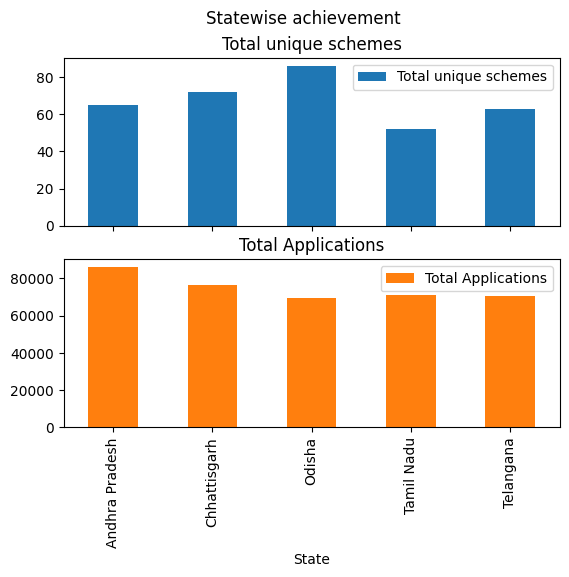

In [40]:
orgSchDiver = unique_data.pivot_table(index=['State','Scheme/Doc'], values='Case Id', aggfunc='count') # Pivoting unique data with "Case Organization" & "Scheme/Doc" rows and count of column "Case Id"
orgSchDiver.reset_index(inplace=True)
Orgwise_Scheme_Diversity = pd.DataFrame(orgSchDiver['State'].value_counts()).reset_index().rename(columns={'count':'Count of unique schemes'}).sort_values('State') # Converting pivot table to pandas data frame
Orgwise_Scheme_Diversity['Total Applications'] = orgSchDiver.groupby(by = 'State')['Case Id'].sum().values # Adding "Total no. of cases" column

'''# 18-35 - DFL Advance/Basic BR
digital_Adult = unique_data[(unique_data['Age'] >= 18) & (unique_data['Age'] <= 35) & (unique_data['Status'] == 'Benefit Received')]
digital_Adult = pd.pivot_table(data=digital_Adult, index = 'Scheme/Doc', values = 'Case Id', aggfunc='count').reset_index()
try:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[1]
except IndexError:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[0]'''

# Shcemes with more than 10% application
orgDict = {} # Declaring a empty dictionary to store Shcemes with more than 10% application
for org in Orgwise_Scheme_Diversity['State']:
    maxApp = pd.DataFrame(orgSchDiver[orgSchDiver['State'] == org].groupby('Scheme/Doc')['Case Id'].sum()
                          >
                          int(orgSchDiver[orgSchDiver['State'] == org]['Case Id'].sum()/10)) # Getting list of more then 10% application
    orgDict[org] = list(maxApp[maxApp['Case Id'] == True].index)
Orgwise_Scheme_Diversity['Shcemes with more than 10% application'] = orgDict.values() # Adding "Shcemes with more than 10% application" column

Orgwise_Scheme_Diversity.rename(columns={"Count of unique schemes":"Total unique schemes"}, inplace=True)
Orgwise_Scheme_Diversity[['State', 'Total unique schemes', 'Total Applications']].set_index('State').plot(kind='bar', title='Statewise achievement', subplots=True)
Orgwise_Scheme_Diversity

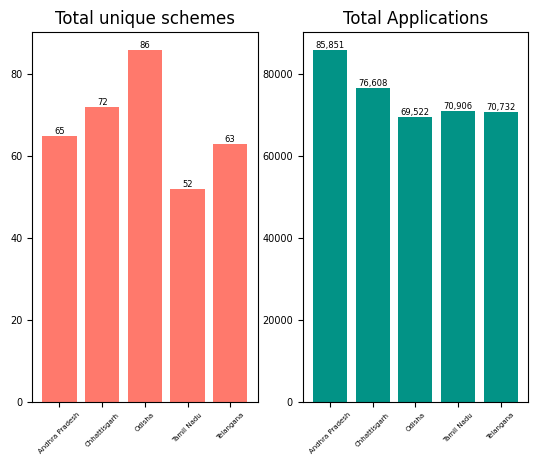

In [41]:
fig, ax = plt.subplots(1,2)
    
bar_container1 = ax[0].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total unique schemes'], color = '#FF796C')
bar_container2 = ax[1].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total Applications'], color = '#029386')

ax[0].tick_params(axis = 'y', labelsize = 7.0)
ax[1].tick_params(axis = 'y', labelsize = 7.0)

ax[0].bar_label(bar_container1, fmt='{:,.0f}', fontsize=6.0)
ax[1].bar_label(bar_container2, fmt='{:,.0f}', fontsize=6.0)

ax[0].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)
ax[1].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)

if len(Orgwise_Scheme_Diversity.State)>1:
    ax[0].set(title = 'Total unique schemes')
    ax[1].set(title = 'Total Applications')
else:
    ax[0].set(title = 'Total unique schemes', ylim = (math.floor(Orgwise_Scheme_Diversity['Total unique schemes'].sum())-1, math.ceil(Orgwise_Scheme_Diversity['Total unique schemes'].sum())+2))
    ax[1].set(title = 'Total Applications', ylim = (math.floor(Orgwise_Scheme_Diversity['Total Applications'].sum()), math.ceil(Orgwise_Scheme_Diversity['Total Applications'].sum())))

# Citizen Scheme Ratio

,Scheme Variety,Total Citizens,Total Cases
0,With 1 scheme,196912,196912
1,With 2 scheme,56302,112604
2,With 3 scheme,12319,36957
3,More than 3 schemes,5905,27146
4,Grand Total,271438,373619
5,More than 7 schemes,95,706


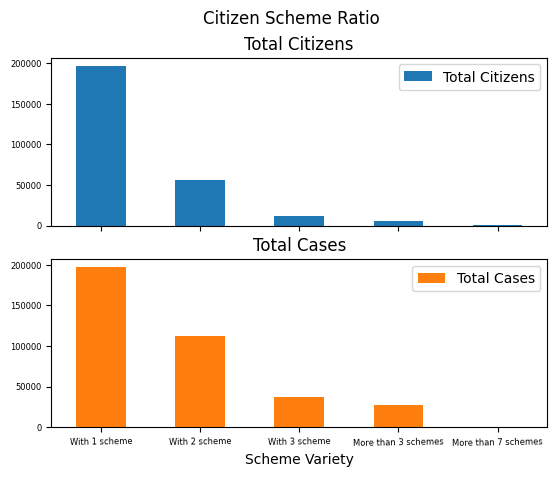

In [42]:
# Scheme variety wise application ratio
cit_sch_ratio = {'Scheme Variety':[],
                 'Total Citizens':[],
                 'Total Cases':[]}

no_of_cases = list(set(unique_data['No of cases'].value_counts().index))
no_of_case = []
no_of_cit = []
for n in no_of_cases:
    if n == 0:
        unique_data.drop(index=(unique_data[unique_data['No of cases'] == n].index), inplace=True)
    
    elif n>0 and n<=3:
        cit_sch_ratio['Scheme Variety'].append('With {0} scheme'.format(n))
        cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
        cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] == n]))
    
    elif n>3:
        if 'More than 3 schemes' in cit_sch_ratio['Scheme Variety']:
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
            
        else:
            cit_sch_ratio['Scheme Variety'].append('More than 3 schemes')
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
    
    else:
        break

# Adding sum of cases and citizens against "More than 3 schemes"
if n>3:
    cit_sch_ratio['Total Cases'].append(sum(no_of_case))
    cit_sch_ratio['Total Citizens'].append(sum(no_of_cit))

# Grand Total
cit_sch_ratio['Scheme Variety'].append('Grand Total')
cit_sch_ratio['Total Citizens'].append(sum(cit_sch_ratio['Total Citizens']))
cit_sch_ratio['Total Cases'].append(sum(cit_sch_ratio['Total Cases']))

# More than 7 schemes
if len(unique_data[unique_data['No of cases'] >= 7]) > 0:
    cit_sch_ratio['Scheme Variety'].append('More than 7 schemes')
    cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] >= 7]))
    cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] >= 7]['Citizen GUID'].value_counts()))

cit_sch_ratio = pd.DataFrame(cit_sch_ratio)
cit_sch_ratio[~(cit_sch_ratio['Scheme Variety']=='Grand Total')].set_index('Scheme Variety').plot.bar(title='Citizen Scheme Ratio', label = 1, subplots=True, logy=False, log=False, rot=True, fontsize=6, mouseover=True)
cit_sch_ratio

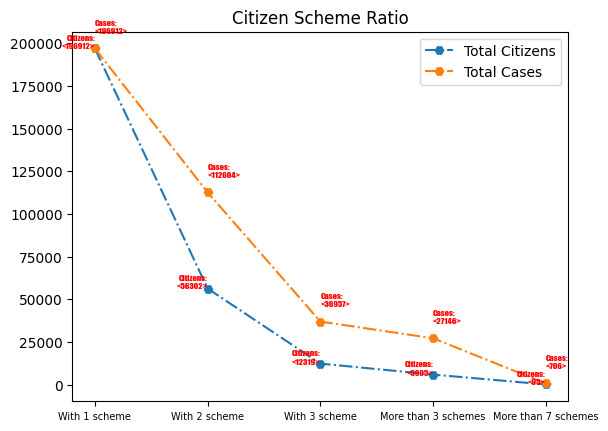

In [43]:
x = cit_sch_ratio[~(cit_sch_ratio['Scheme Variety']=='Grand Total')]

fig, ax = plt.subplots(1)

ax.plot(x['Scheme Variety'], x[['Total Citizens','Total Cases']], marker = 'H', linestyle = '-.', animated=True)
ax.set_xticklabels(labels=x['Scheme Variety'], fontdict={'fontsize':7.0})
ax.legend(['Total Citizens','Total Cases'])
ax.set(title = 'Citizen Scheme Ratio')
for i, (xi, yi, zi) in enumerate(zip(x['Scheme Variety'], x['Total Citizens'], x['Total Cases'])):
    ax.annotate(f'Citizens:\n<{yi}>', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='right', va='top', fontsize = 6.0, fontname='fantasy', color = 'red')
    ax.annotate(f'Cases:\n<{zi}>', (xi, zi), textcoords="offset points", xytext=(0, 10), ha='left', va='bottom', fontsize = 6.0, fontname='fantasy', color = 'red')

#ax.plot(x['Scheme Variety'], x['Total Cases'], marker = '*', linestyle = '-')
#for i, (xi, yi) in enumerate(zip(x['Scheme Variety'], x['Total Cases'])):
#    ax.annotate(f'{yi}', (xi, yi), textcoords="offset pints", xytext=(0, 10), ha='center', annotation_clip = True)

fig.show()

# Scheme Doc Ratio

,Scheme type,Unique Schemes,Total Applications,Total BV
0,Document,70,110261,3932179174
1,Scheme,151,243130,15547717240


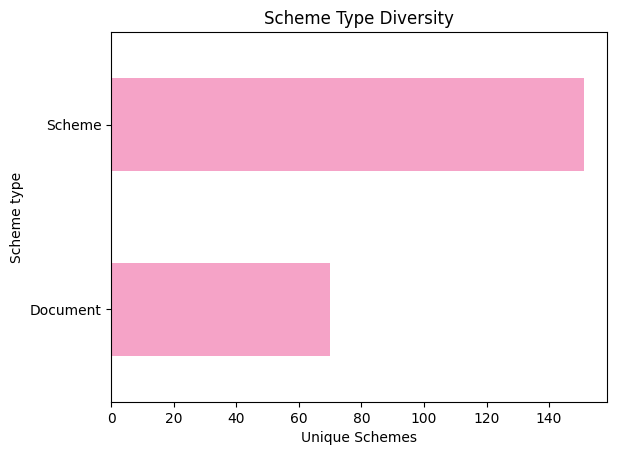

In [44]:
# Scheme type Total application
sch_doc_application = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_application.rename(columns={'Scheme/Doc' : 'Total Applications'}, inplace=True)

# Scheme type Total Benefit value
sch_doc_application['Total BV'] = list(unique_data.groupby(by ='Scheme type')['Benefit Value'].sum())

# Scheme type Total unique schemes
sch_doc_schemes = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].value_counts()).reset_index().drop(columns='count')
sch_doc_schemes = pd.DataFrame(sch_doc_schemes.groupby(by='Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_schemes.rename(columns={'Scheme/Doc' : 'Unique Schemes'}, inplace=True)

# Merging both tables
sch_doc_ratio = sch_doc_schemes.merge(sch_doc_application, on = 'Scheme type', how = 'left')
sch_doc_ratio[['Scheme type','Unique Schemes']].set_index('Scheme type').plot(kind='barh', title='Scheme Type Diversity', color='#F5A3C7', legend=False, xlabel="Unique Schemes")
sch_doc_ratio

# Top Bottom HD

In [45]:
step = unique_data.copy() # Copying data to another variable to make some changes.
step['HD ID'] = step['HD ID'].fillna('a') # Replacing missing values with simple character 'a'
step['HD ID'] = step['HD ID'].astype('str') # Changing HD ID column data type to string so that all values can be converted to lower case.
step['HD ID'] = step['HD ID'].apply(lambda x: x.lower()) # Changing values to lower case.
step1 = pd.pivot_table(data = step, index = ['HD ID', 'HD Name','Scheme/Doc GUID'], values = 'Case Id', aggfunc = 'count') # Pivoting to get unique HD ID/ HD Name/ Scheme Name
step1 = pd.DataFrame(step1.drop(columns='Case Id').reset_index()) # Delete unwanted column 'Case Id'
step1 = pd.DataFrame(pd.pivot_table(data=step1, index=['HD ID','HD Name'], values='Scheme/Doc GUID', aggfunc='count').reset_index()).rename(columns={'Scheme/Doc GUID' : 'Total unique schemes'}) # Pivoting to get unique HD ID/ HD Name and unique count of schemes.
step2 = pd.DataFrame(step.groupby(by = 'HD ID')['Case Id'].count()).reset_index().rename(columns={'Case Id' : 'Total Applications'})
step3 = step.groupby('HD ID')['Benefit Value'].sum().reset_index()
step4 = pd.pivot_table(data=step, index = ['HD ID'], values='HD_Payment', aggfunc='sum').reset_index().rename(columns = {'HD_Payment' : 'Total Payment'}) # Summing up HD payment

step5 = pd.pivot_table(rejectedDF, index=['HD ID'], values='HD_Payment', aggfunc='sum')
top_bottom_hd = step1.merge(step2, on = 'HD ID', how='left').merge(step3, on = 'HD ID', how='left').merge(step4, on = 'HD ID', how='left').merge(step5, on = 'HD ID', how='left')
top_bottom_hd.HD_Payment = top_bottom_hd.HD_Payment.fillna(0)
top_bottom_hd.rename(columns={'Benefit Value':'Benefit Value Delivered', 'HD_Payment' : 'Rejected Payment'}, inplace=True)
top_bottom_hd.loc[len(top_bottom_hd)] = ['Grand Total', '', top_bottom_hd['Total unique schemes'].sum(),
                                         top_bottom_hd['Total Applications'].sum(), top_bottom_hd['Benefit Value Delivered'].sum(),
                                         top_bottom_hd['Total Payment'].sum(), top_bottom_hd['Rejected Payment'].sum()]
top_bottom_hd.tail()

KeyError: 'HD_Payment'

In [ ]:
unique_data[unique_data['HD ID'] == 'rathod.dinesh']['HD_Payment'].sum()

In [ ]:
top_bottom_hd

# Scheme Categorisation

In [ ]:
Scheme_Categorisation = pd.DataFrame(pd.pivot_table(data = unique_data, index=['Scheme type', 'Scheme/Doc', 'Benefit Value'], values='Case Id', aggfunc= 'count')).reset_index()
Scheme_Categorisation['Total BV Delivered'] = Scheme_Categorisation['Benefit Value']*Scheme_Categorisation['Case Id']
Scheme_Categorisation.rename(columns={'Case Id':'Total Applications'}, inplace=True)
Scheme_Categorisation.loc[len(Scheme_Categorisation)] = ['Grand Total', '', '', Scheme_Categorisation['Total Applications'].sum(), Scheme_Categorisation['Total BV Delivered'].sum()]
Scheme_Categorisation.tail()

# Schemewise O/S/BR

In [ ]:
Sch_O_S_BR = pd.pivot_table(data = unique_data, index='Scheme/Doc', columns='Status', values='Case Id', aggfunc='count', fill_value=0)
Sch_O_S_BR = pd.DataFrame(Sch_O_S_BR).reset_index()
if 'Benefit Received' not in Sch_O_S_BR.columns:
    if 'Submitted' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Open' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
elif 'Submitted' not in Sch_O_S_BR.columns:
    if 'Benefit Received' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Open' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Benefit Received']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Benefit Received']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
elif 'Open' not in Sch_O_S_BR.columns:
    if 'Benefit Received' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Submitted' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted', 'Benefit Received']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Submitted', 'Benefit Received']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
else:
    Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted', 'Benefit Received']]
    Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted', 'Benefit Received']].sum(axis=1)
    Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(),  Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    
Sch_O_S_BR.tail()

# Gender Bifurcation

In [ ]:
gen_Bif = pd.DataFrame(unique_data['Gender'].value_counts()).reset_index()
gen_Bif['% Contri.'] = round((gen_Bif['count']/unique_data['Gender'].value_counts().sum())*100,2)
gen_Bif.rename(columns={'count':'Total Applications'},inplace=True)
gen_Bif.loc[len(gen_Bif)] = ['Total', gen_Bif['Total Applications'].sum(), '']
if len(gen_Bif['Gender']) == 4:
    gen_Bif[['Gender', 'Total Applications']][0:3].set_index('Gender').plot(kind='barh', color='#F5A3C7')
elif len(gen_Bif['Gender']) == 3:
    gen_Bif[['Gender', 'Total Applications']][0:2].set_index('Gender').plot(kind='barh', color='#F5A3C7')
else:
    gen_Bif[['Gender', 'Total Applications']][0:1].set_index('Gender').plot(kind='barh', color='#F5A3C7')
gen_Bif

In [ ]:
fig, ax = plt.subplots(1)

if len(gen_Bif['Gender']) == 4:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:3], y = gen_Bif['Gender'][0:3], width = gen_Bif['Total Applications'][0:3], color = '#F5A3C7')
elif len(gen_Bif['Gender']) == 3:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:2], y = gen_Bif['Gender'][0:2], width = gen_Bif['Total Applications'][0:2], color = '#F5A3C7')
else:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:1], y = gen_Bif['Gender'][0:1], width = gen_Bif['Total Applications'][0:1], color = '#F5A3C7')

ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=8.0, fontfamily='serif', fontweight='bold')
ax.set(title = 'Gender Bifurcation')

fig.show()

# Centrewise Repeat Mobile numbers

In [ ]:
repeat_mobile = pd.pivot_table(data=unique_data, index=['District', 'Mobile', 'Citizen GUID'], values='Case Id', aggfunc='count').sort_values(by='Case Id', ascending=False).reset_index()
repeat_mobile = pd.pivot_table(data=repeat_mobile, index=['District', 'Mobile'], values='Citizen GUID', aggfunc='count').sort_values(by='Citizen GUID', ascending=False).reset_index()
repeat_mobile = repeat_mobile[repeat_mobile['Citizen GUID']>30]
if repeat_mobile['Citizen GUID'].sum()>0:
    repeat_mobile.loc[len(repeat_mobile)] = ['Grand Total','',repeat_mobile['Citizen GUID'].sum()]
repeat_mobile.rename(columns={"Citizen GUID":"Total Citizens"}, inplace=True)
repeat_mobile.head()

# Agewise Citizen Distribution

In [ ]:
plot = sns.displot(data=unique_data, x='Gender', y='Age', kind='hist', bins=15, legend=True,  color='#F5A3C7', aspect=2)
plot.set(ylabel='No. of citizens')
plt.show()

# E-Gov and DFL Status Summary

In [ ]:
eGov_DFL_Summary = pd.pivot_table(data=og_DF, index='District', columns=['Scheme Category','Status'], values='Case Id', aggfunc='count', fill_value=0)
eGov_DFL_Summary['Total'] = eGov_DFL_Summary.sum(axis = 1, numeric_only = 'True').values
eGov_DFL_Summary.sort_values(by='Total',ascending=False, inplace=True)
eGov_DFL_Summary.loc[len(eGov_DFL_Summary)] = eGov_DFL_Summary.sum(axis = 0, numeric_only = 'True').values
eGov_DFL_Summary.rename(index={eGov_DFL_Summary.index[-1]:'Grand Total'}, inplace=True)
eGov_DFL_Summary

# Exporting data to Excel Sheets

In [ ]:
# Exporting data of unique records to Excel file.
with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' data.xlsx') as writer:
    unique_data.to_excel(writer, sheet_name='Schemes Data', index=False) # Exporting unique data
    projectwise_O_S_BR.to_excel(writer, sheet_name='projectwise_O_S_BR', index=False)
    districtWise.to_excel(writer, sheet_name='Districtwise achv', index=False)
    if repeat_mobile.shape[0]>0:
        repeat_mobile.to_excel(writer,sheet_name='Repeat_mobile_nos', index=False)
    Orgwise_Scheme_Diversity.to_excel(writer, sheet_name='Orgwise_Scheme_Diversity', index=False)
    cit_sch_ratio.to_excel(writer, sheet_name='Citizen_Scheme_Ratio', index=False)
    sch_doc_ratio.to_excel(writer, sheet_name='Scheme_Doc_Ratio', index=False)
    top_bottom_hd.to_excel(writer, sheet_name='Top_Bottom_HD', index=False)
    Scheme_Categorisation.to_excel(writer, sheet_name='Scheme_Categorisation', index=False)
    Sch_O_S_BR.to_excel(writer, sheet_name='Schwise_O_S_BR', index=False)
    gen_Bif.to_excel(writer, sheet_name='Gender_Bifurcation', index=False)
    if dfl.shape[0]>0:
        eGov_DFL_Summary.to_excel(writer, sheet_name='eGov_DFL_Status_Summary')
        dfl.to_excel(writer, sheet_name='DFL data', index=False)
    rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
    duplicateData.to_excel(writer, sheet_name='Duplicate data', index=False) # Exporting duplicate data
    parentDuplicateData.to_excel(writer, sheet_name='Parent Sch Duplicate', index=False) # Exporting parent scheme duplicate data
    #plot.savefig(writer, sheet_name='Age_Dist')

exe_end = dt.now() # Recording execution end time
print('{0} project data exported to Excel!\nTotal {1} unique records exported.\nTotal {2} duplicate records exported.\nTotal {3} rejected records exported'.format(fn.split('_')[2]+' '+fn.split('_')[3],
                                                                                                                                                                   unique_data.shape[0],
                                                                                                                                                                   duplicateData.shape[0],
                                                                                                                                                                   rejectedDF.shape[0]))

# Logging the execution process

In [ ]:
log = [init_file_size,exe_start.strftime("%d/%m/%Y %H:%M:%S"),exe_end.strftime("%d/%m/%Y %H:%M:%S"),int(round((exe_end-exe_start).total_seconds(),0)),fn.split('_')[2]+' '+fn.split('_')[3],unique_data.shape[0],duplicateData.shape[0],rejectedDF.shape[0]]

lwb = load_workbook(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Loading the workbook
lws = lwb.worksheets[0] # Setting the worksheet
lws.append(log) # Appending the log row
lwb.save(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Saving the logged data
print('Logging Done!\n',log)

In [ ]:
og_DF.Gender.value_counts().plot.barh(color='#F5A3C7')
plt.show()

In [ ]:
og_DF.info()

# Exporting original transformed data to excel.

In [ ]:
# Notifying user to give consent..
notification = Notify()
notification.title = "Consent Required"
notification.message = "Hello Akash! Waiting for your consent."
notification.audio = "E:/Music/Ringtone/Consent required1.wav"
notification.send()

# Asking consent from user for original data export.
consent = input("Do you want to export original data? (Y/N)\n")

if consent in ["Y","y"]:
    with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' og_data.xlsx') as writer:
        try:
            print("Exporting full data.")
            og_DF.to_excel(writer, sheet_name='Raw Data', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
            print("Export to excel success!")
        except ValueError:
            print("Full data export failed due to excel rows limit exceeded hence exporting data in part.")
            og_DF[og_DF['Scheme Category'] == 'E-Gov'].to_excel(writer, sheet_name='E-Gov', index=False)
            og_DF[og_DF['Scheme Category'] == 'DFL'].to_excel(writer, sheet_name='DFL', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
            print("Export to excel success!")
else:
    print("You dont want original data!")

In [ ]:
# Changing status values to O_S_BR
og_summary = pd.DataFrame(og_DF[og_DF['Scheme Category']=='E-Gov'].Status.value_counts())
og_summary.rename(columns={'count':'Total Application'}, inplace=True)
og_summary.reset_index(inplace=True)
og_summary.loc[len(og_summary.index)] = ['Grand Total', og_summary['Total Application'].sum()]
try:
    og_summary = og_summary.iloc[[2,1,0,3]]
    plt.pie(og_summary['Total Application'][0:3], labels=og_summary['Status'][0:3], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05,0.09])
except IndexError:
    og_summary = og_summary.iloc[[1,0,2]]
    plt.pie(og_summary['Total Application'][0:2], labels=og_summary['Status'][0:2], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05])
og_summary

# Notifying user using Notification

In [ ]:
notification.title = "Process Execution Alert"
notification.message = "Hello Akash! Python script execution has completed."
notification.audio = "E:/Music/Ringtone/Process Execution Alert.wav"
notification.send(block=False)
print('Script execution completed!')

In [ ]:
unique_data.isna().sum()

In [ ]:
cat_col = []
num_col = []

for c in unique_data.select_dtypes(exclude='datetime'):
    if unique_data[c].dtype == 'object':
        if c not in ['Case Id','Scheme/Doc GUID','Citizen GUID','Family GUID']:
            cat_col.append(c)
    elif unique_data[c].dtype in ['int64','float64']:
        if c not in ['Mobile','AMS ID']:
            num_col.append(c)    

In [ ]:
cat_col

In [ ]:
num_col

In [ ]:
scaler = StandardScaler()
unique_data_scaled = scaler.fit_transform(unique_data[num_col])
unique_data_scaled_numcol = pd.DataFrame(unique_data_scaled, columns=num_col)
unique_data_scaled_numcol.head()

In [ ]:
sns.heatmap(unique_data_scaled_numcol.corr())

In [ ]:
unique_data_scaled

In [ ]:
encoder = OneHotEncoder()
#unique_data_scaled = pd.DataFrame(unique_data_scaled, columns=num_col)
unique_data_encode = encoder.fit_transform(unique_data[cat_col])
unique_data_encode = pd.DataFrame(unique_data_encode, index=unique_data.index)
#unique_data_scaled_catcol = pd.DataFrame(unique_data_scaled, columns=cat_col)
#unique_data_scaled_catcol.head()

In [ ]:
unique_data_encode.head()